#Heart Failure Prediction

The dataset provided is related to heart disease prediction, which is crucial for understanding and addressing cardiovascular health issues. It includes a variety of features that contribute to assessing an individual's risk for heart disease.



1.   Age: Represents the age of the individual, an important factor in assessing heart disease risk.

2.  Sex: Indicates the gender of the individual (M for male, F for female),

3.   ChestPainType: Categorizes the type of chest pain experienced (e.g., ATA - Atypical Angina, NAP - Non-Anginal Pain, ASY - Asymptomatic), providing insights into potential heart-related issues.

4.   RestingBP: The resting blood pressure of the individual, measured in mmHg, which is a critical indicator of heart health.


5.   Cholesterol: Total serum cholesterol levels, measured in mg/dL, which can impact heart disease risk.


6.  FastingBS: Fasting blood sugar levels (0 for normal, 1 for high), helping assess metabolic health.
7.   RestingECG: Results of the resting electrocardiogram (Normal, ST - ST-T Wave Abnormality, LVH - Left Ventricular Hypertrophy), which indicates the electrical activity of the heart.


8.   MaxHR: Maximum heart rate achieved during exercise, which reflects cardiovascular fitness and potential heart issues.


9.  xerciseAngina: Indicates whether the individual experiences angina (chest pain) during exercise (Y for yes, N for no), a significant symptom of heart disease.


10.   Oldpeak: Represents the ST depression induced by exercise relative to rest, an important diagnostic measure.

1.  ST_Slope: Describes the slope of the peak exercise ST segment (Up, Flat, Down), providing further insight into cardiac function.
2.  HeartDisease: The target variable (0 for no heart disease, 1 for heart disease), indicating the presence or absence of heart disease, which is the primary focus of the prediction model.






This dataset is valuable for building predictive models to identify individuals at risk of heart disease, allowing for early intervention and better health outcomes. Analyzing the relationships between these features and heart disease can help improve understanding and treatment of cardiovascular conditions.

 # Import Libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)

# Model saving
import joblib


# Load Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML/Classification project/Heart Failure.csv')

# Initial Data Inspection

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000,1060.000000
mean,54.291509,132.870755,197.458491,0.254717,135.082075,0.943679,0.580189
std,9.501201,18.244310,108.939463,0.435908,25.150348,1.072406,0.493761
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,48.000000,120.000000,171.000000,0.000000,118.000000,0.000000,0.000000
50%,55.000000,130.000000,221.000000,0.000000,135.000000,0.800000,1.000000
75%,61.000000,140.250000,266.000000,1.000000,154.000000,1.600000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(1060, 12)

In [6]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Handle Duplicates

In [7]:
df.duplicated().mean()*100

np.float64(13.39622641509434)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

# Understand Unique Values per Column

In [10]:
for i in df.columns:
  print(df[i].unique(),i)
  print('*'*100)

[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] Age
****************************************************************************************************
['M' 'F'] Sex
****************************************************************************************************
['ATA' 'NAP' 'ASY' 'TA'] ChestPainType
****************************************************************************************************
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] RestingBP
****************************************************************************************************
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 

#  Check for Missing *Values*

In [11]:
print(f"Missing values: {df.isnull().sum() * 100/len(df)}")

Missing values: Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64


 #  Exploratory Data Analysis (EDA)

🔸 Target Variable Distribution

<ipython-input-12-e03ba2830a6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='Reds')


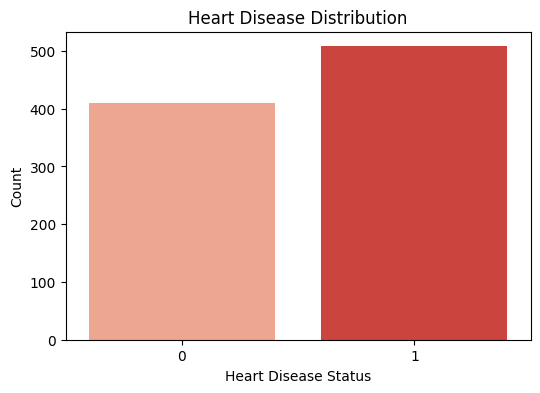

In [12]:
heart_disease_counts = df['HeartDisease'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=heart_disease_counts.index, y=heart_disease_counts.values, palette='Reds')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

🔸  Age Distribution

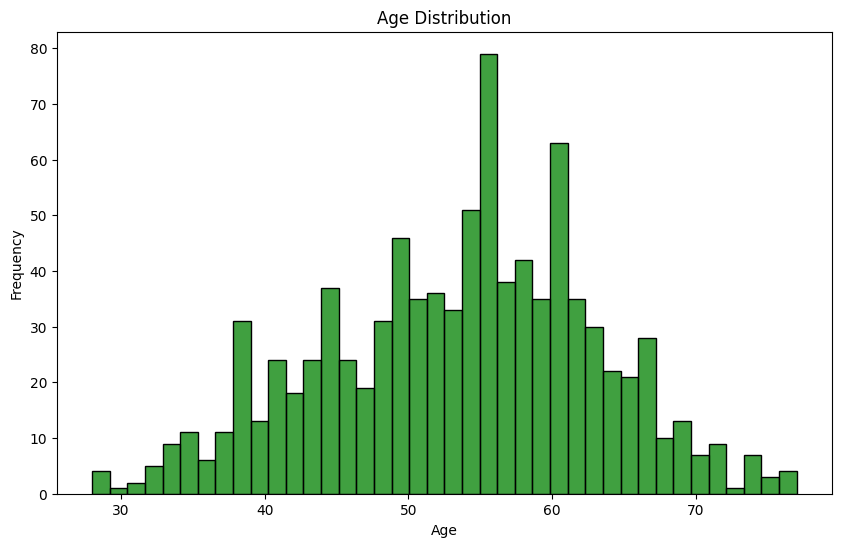

In [13]:
# Show age distribution
plt.figure(figsize=(10, 6))

sns.histplot(df['Age'], bins=40, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

🔸 Chest Pain Types

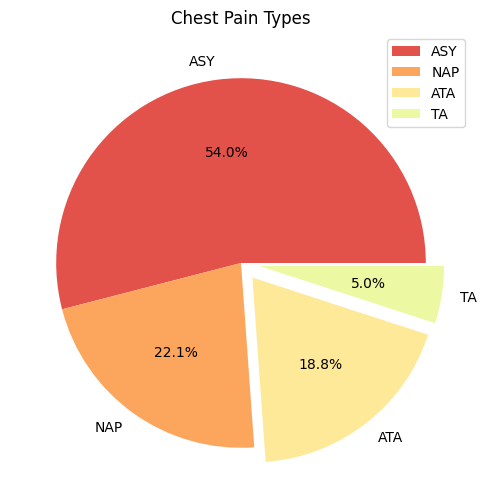

In [14]:
ChestPainType = df['ChestPainType'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(ChestPainType, labels=['ASY', 'NAP', 'ATA', 'TA'],
        autopct='%1.1f%%', explode=[0.0, 0.0, 0.1, 0.1],
        colors=sns.color_palette('Spectral'))
plt.title('Chest Pain Types')
plt.legend()
plt.show()

🔸  Blood Pressure vs Age

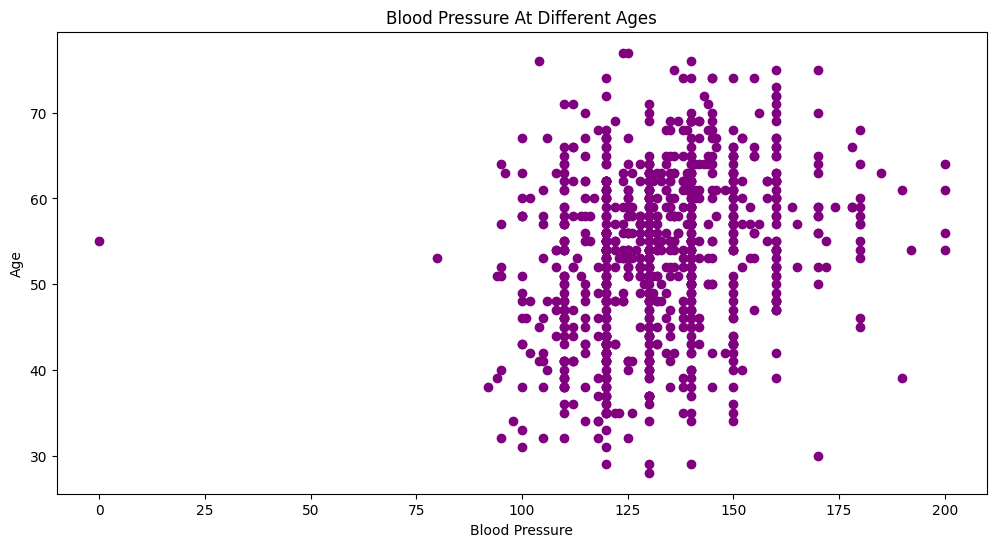

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(df['RestingBP'], df['Age'], color='purple')
plt.title('Blood Pressure At Different Ages')
plt.xlabel('Blood Pressure')
plt.ylabel('Age')
plt.show()



🔸  Cholesterol vs Age

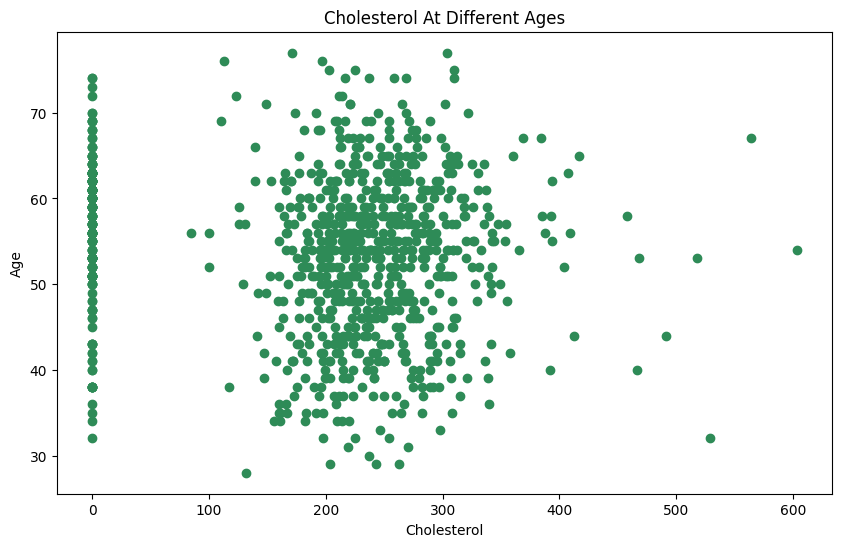

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Cholesterol'], df['Age'], color='seagreen')
plt.title('Cholesterol At Different Ages')
plt.xlabel('Cholesterol')
plt.ylabel('Age')
plt.show()

🔸  RestingECG Distribution

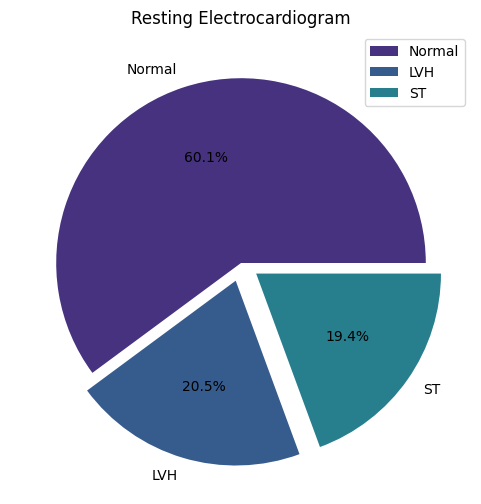

In [17]:
RestingECG = df['RestingECG'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(RestingECG, labels=['Normal', 'LVH', 'ST'],
        autopct='%1.1f%%', explode=[0.0, 0.1, 0.1],
        colors=sns.mpl_palette("viridis"))
plt.title('Resting Electrocardiogram')
plt.legend()
plt.show()


🔸  MaxHR vs Age

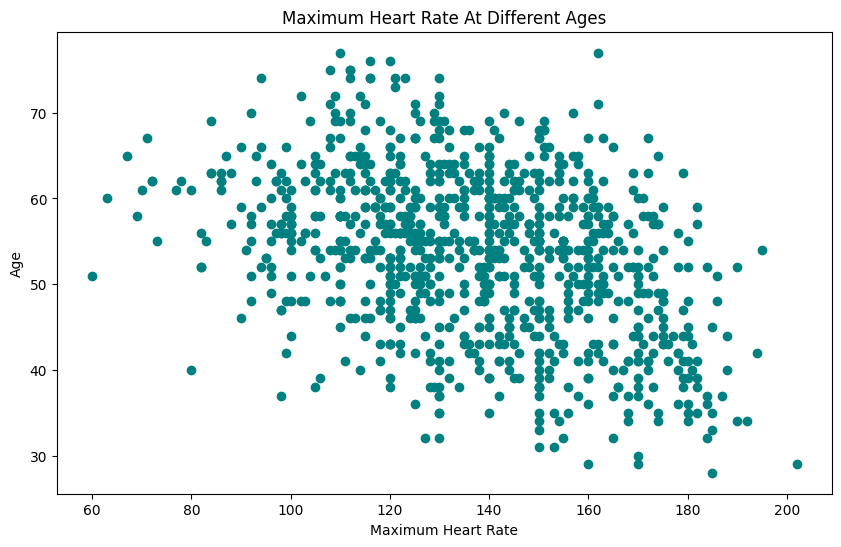

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['MaxHR'], df['Age'], color='teal')
plt.title('Maximum Heart Rate At Different Ages')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Age')
plt.show()


# Data Cleaning

🔸  Replace Zero Values

In [19]:
df['RestingBP'] = df['RestingBP'].replace(0, df['RestingBP'].median())
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].median())

🔸  Info after cleaning

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 93.2+ KB


🔸  Encoding Categorical Features

In [21]:
df = pd.get_dummies(df, drop_first=True)
df.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(1), int64(6

# Outlier Detection & Removal

🔸  Boxplots

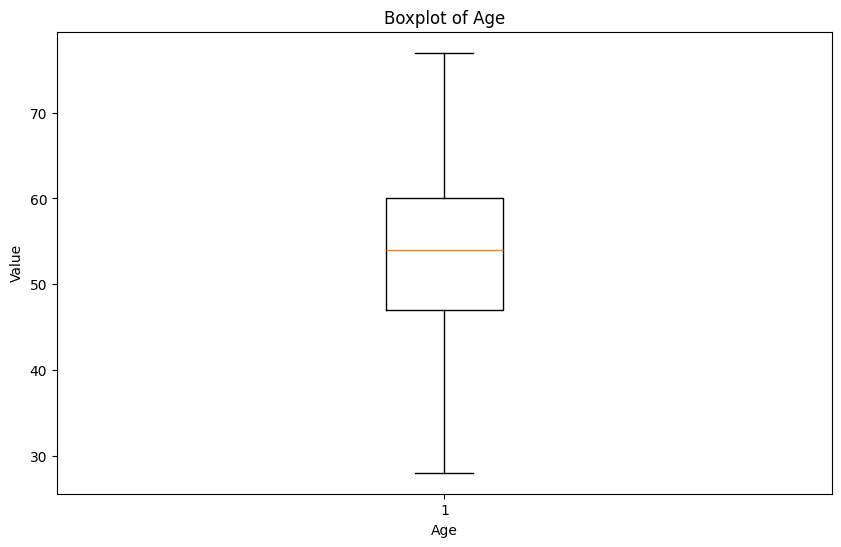

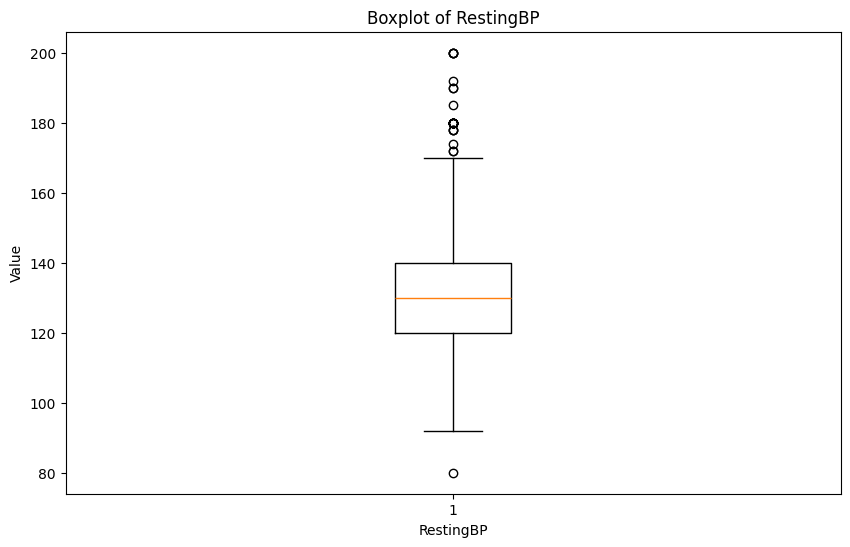

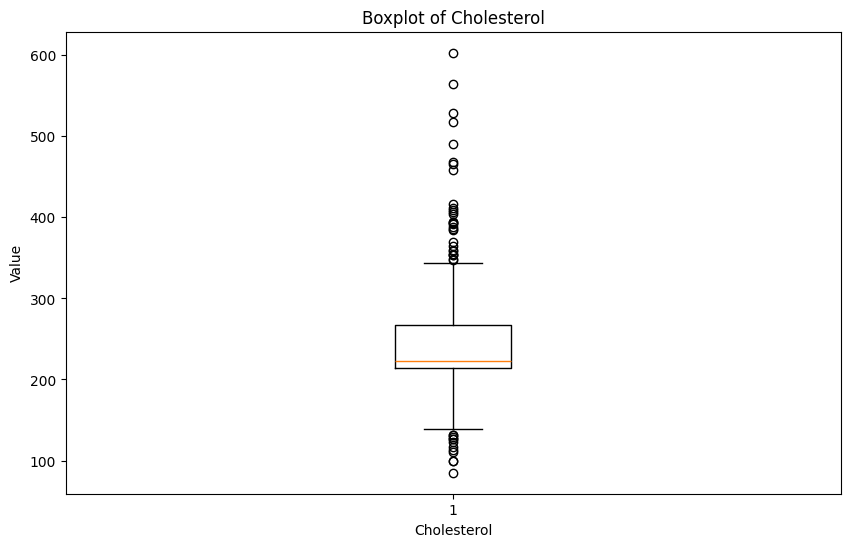

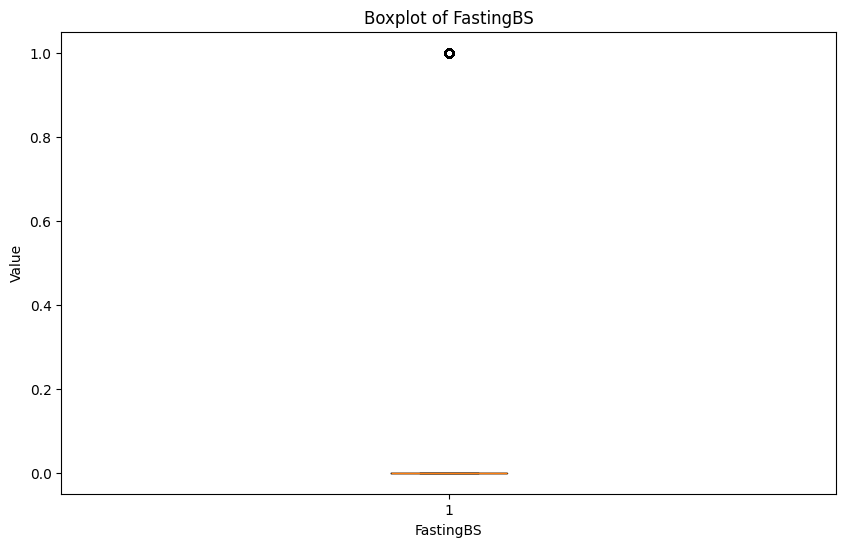

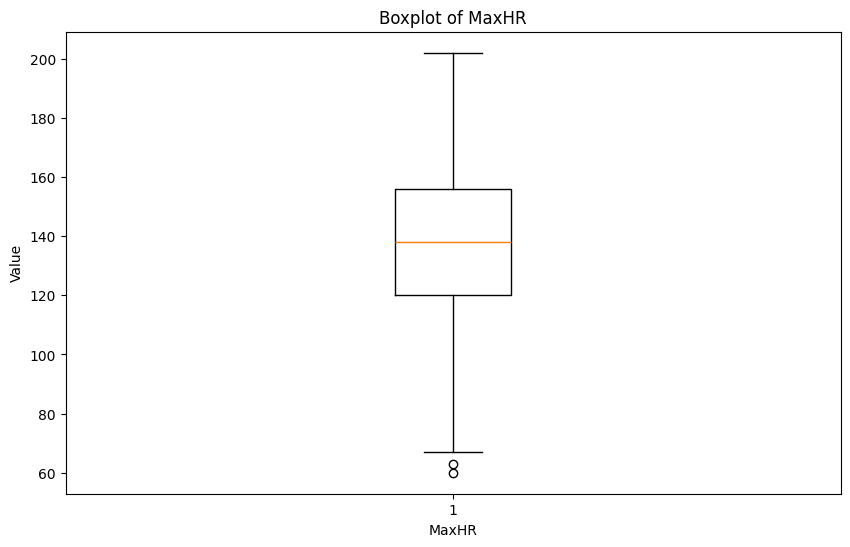

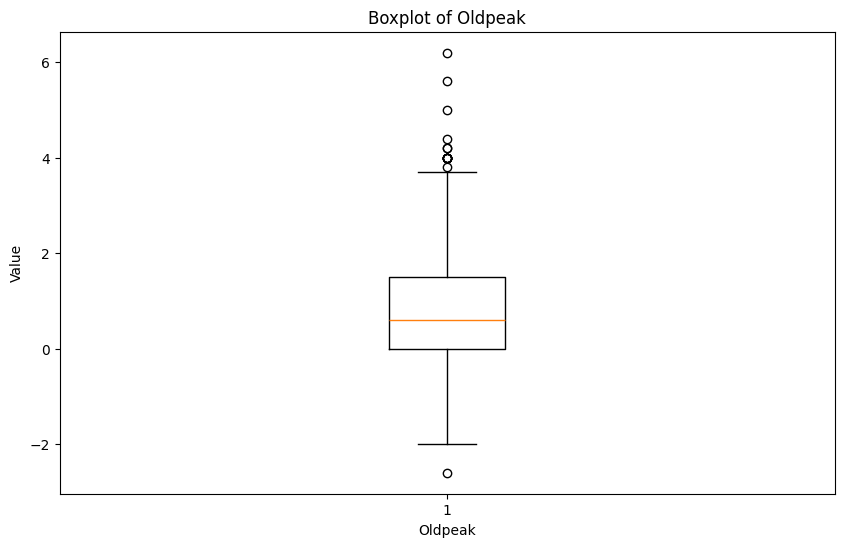

In [23]:
for feature in ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')


🔸  Identify and Remove Outliers

In [24]:
outlier_indices = set()


for feature in ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR


    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_indices.update(outliers.index)


    print(f"Outliers for {feature}:")
    print(outliers[feature])
    print('*' * 50)

df = df.drop(index=outlier_indices).reset_index(drop=True)

print("Outliers removed across selected features.")


Outliers for RestingBP:
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
314     80
365    200
372    185
399    200
411    180
423    180
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64
**************************************************
Outliers for Cholesterol:
28     468
30     518
58     365
69     412
76     529
78     100
98      85
102    392
103    466
108    129
123    393
132    388
149    603
182    404
208    132
227    117
238    355
250    491
256    394
263    126
278    347
284    358
444    100
496    458
498    384
522    349
541    113
571    110
573    123
577    369
613    385
616    564
624    407
667    417
675    126
686    354
738    360
796    409
803    394
872    353
915    131
Name: Cholesterol, dtype: int64
**************************************************
Outliers for FastingBS:
36     1
38   

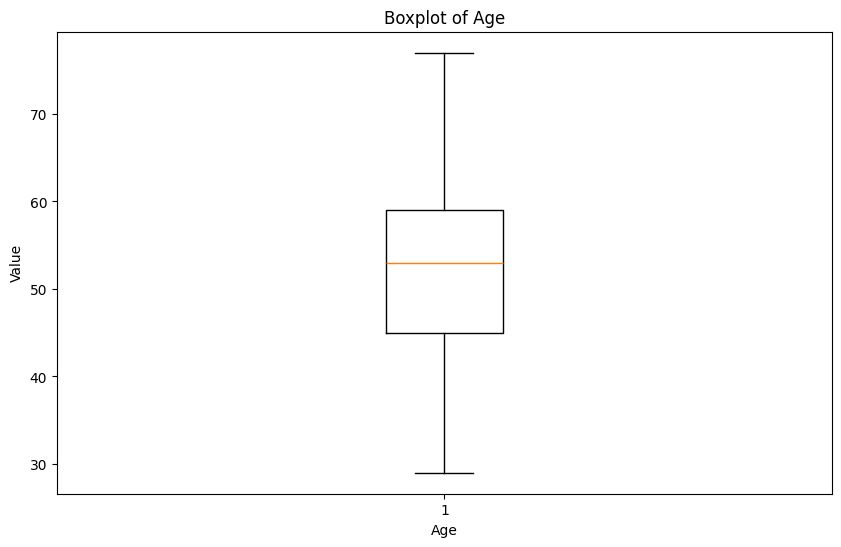

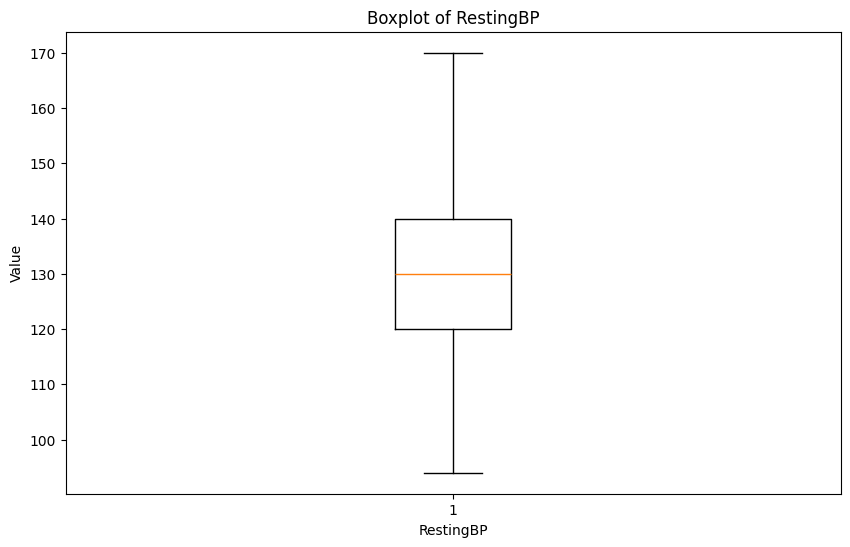

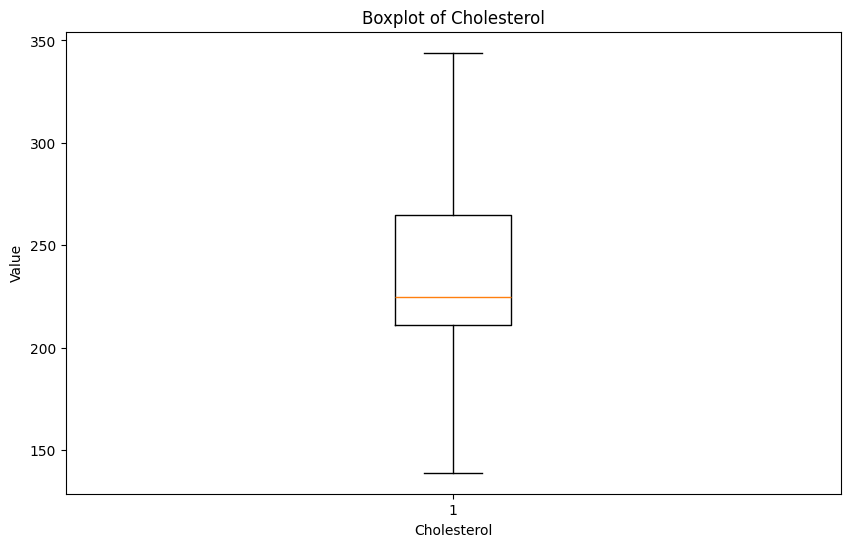

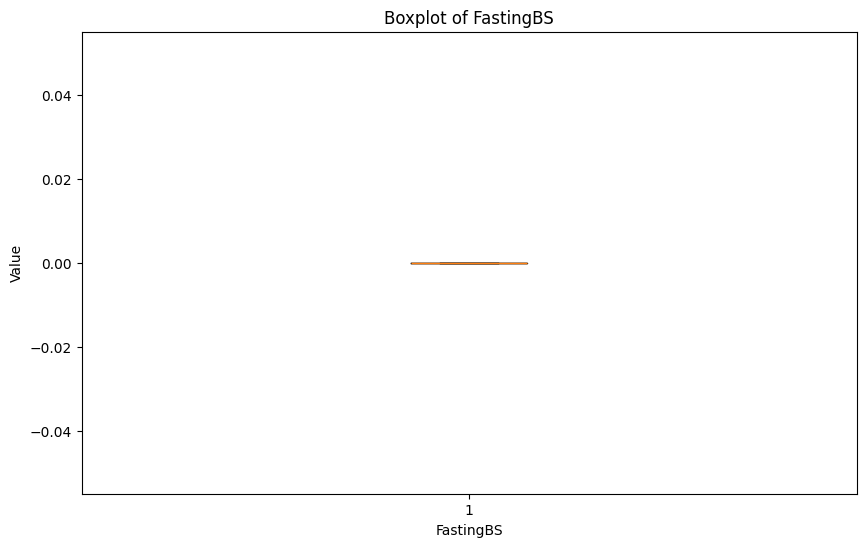

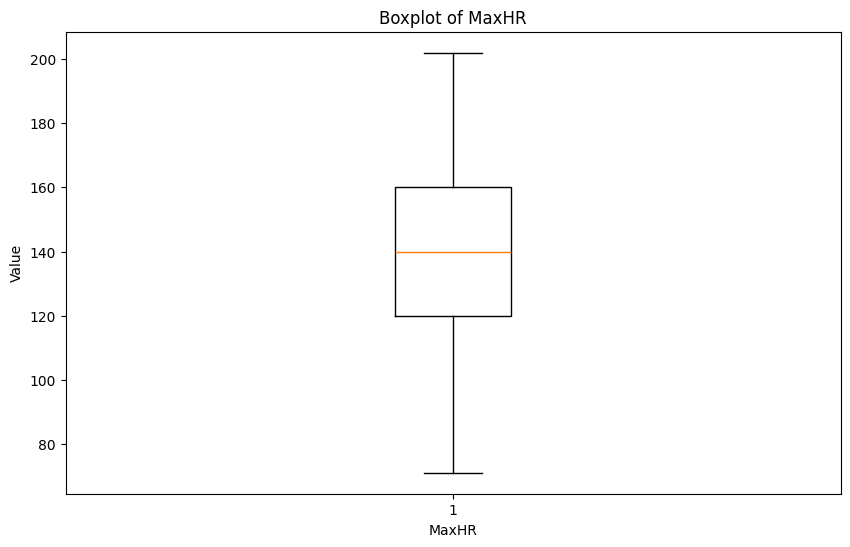

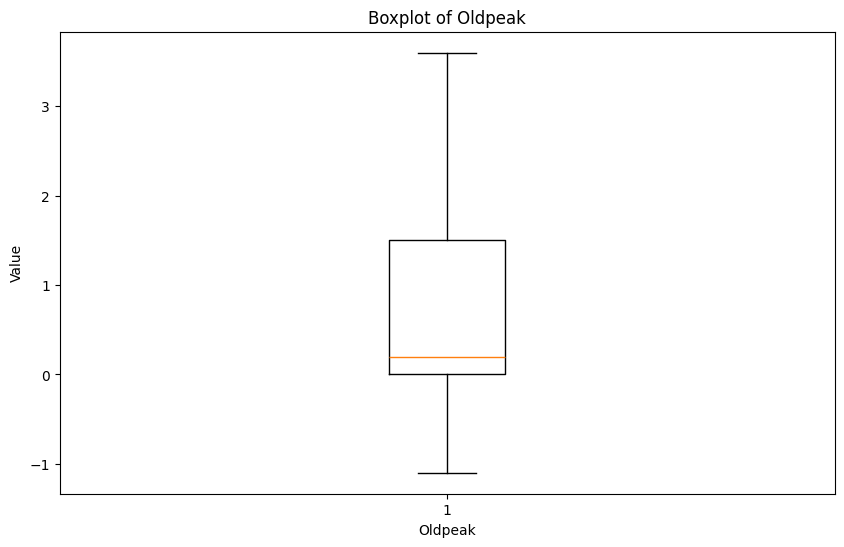

In [25]:
for feature in ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Value')


#  Data Preparation: Dividing into Dependent and Independent Variables

In [26]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [27]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,41,120,157,0,182,0.0,True,True,False,False,True,False,False,False,True
639,57,140,241,0,123,0.2,False,False,False,False,True,False,True,True,False
640,45,110,264,0,132,1.2,True,False,False,True,True,False,False,True,False
641,57,130,236,0,174,0.0,False,True,False,False,False,False,False,True,False


In [28]:
y

,HeartDisease
0,0
1,1
2,0
3,1
4,0
...,...
638,0
639,1
640,1
641,1


 # Splitting the Data into Training and Testing Sets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
329,58,120,223,0,106,1.5,True,False,False,False,False,False,True,False,False
29,56,130,167,0,114,0.0,True,False,True,False,True,False,False,False,True
600,60,140,185,0,155,3.0,True,False,True,False,False,False,False,True,False
575,54,120,258,0,147,0.4,True,False,True,False,False,False,False,True,False
433,61,140,207,0,138,1.9,True,False,False,False,False,False,True,False,True


# Feature Scaling

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Handling Class Imbalance using SMOTE

In [31]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

**Visualize relationships between features and the target variable.**

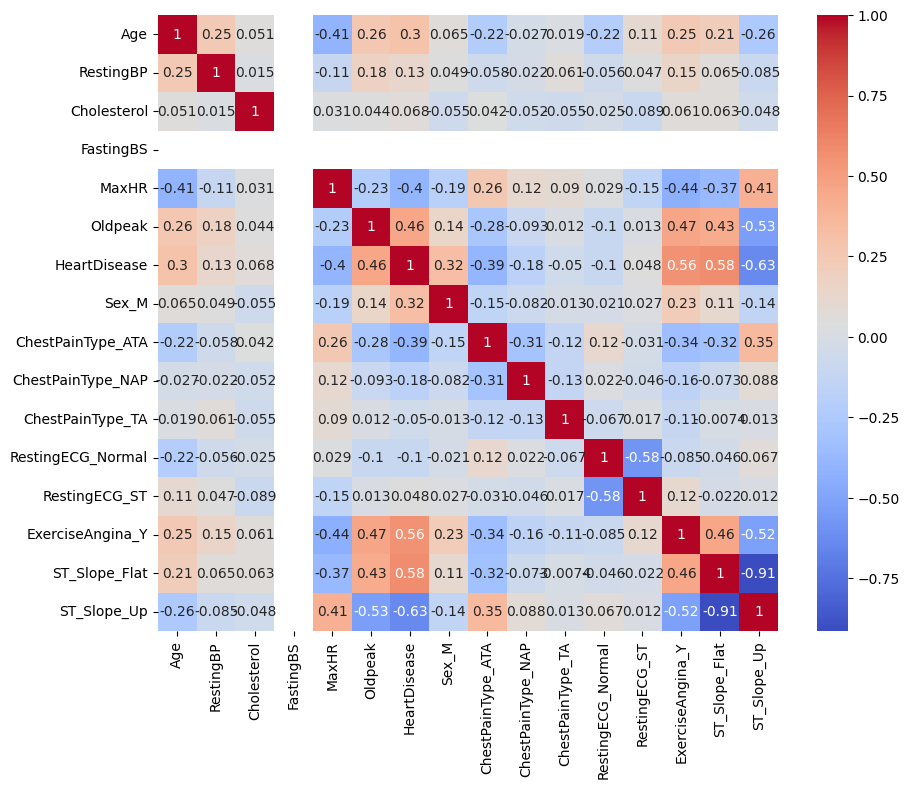

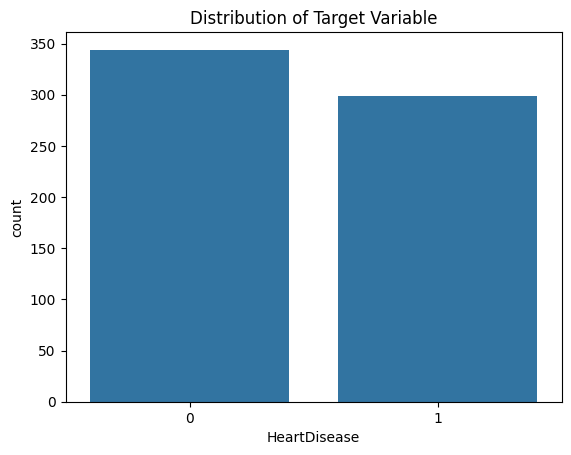

In [32]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Distribution of the target variable
sns.countplot(x=y)
plt.title("Distribution of Target Variable")
plt.show()


#Model Performance

In [33]:
# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'AdaBoost': AdaBoostClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 30)


Model: KNN
Accuracy: 0.5736434108527132
Precision: 0.5238095238095238
Recall: 0.5689655172413793
Confusion Matrix:
 [[41 30]
 [25 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.58      0.60        71
           1       0.52      0.57      0.55        58

    accuracy                           0.57       129
   macro avg       0.57      0.57      0.57       129
weighted avg       0.58      0.57      0.57       129

------------------------------
Model: Logistic Regression
Accuracy: 0.8449612403100775
Precision: 0.8392857142857143
Recall: 0.8103448275862069
Confusion Matrix:
 [[62  9]
 [11 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        71
           1       0.84      0.81      0.82        58

    accuracy                           0.84       129
   macro avg       0.84      0.84      0.84       129
weighted avg       0.84      0.84   

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Random Forest
Accuracy: 0.8682170542635659
Precision: 0.8596491228070176
Recall: 0.8448275862068966
Confusion Matrix:
 [[63  8]
 [ 9 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88        71
           1       0.86      0.84      0.85        58

    accuracy                           0.87       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.87      0.87      0.87       129

------------------------------
Model: SVC
Accuracy: 0.6821705426356589
Precision: 0.660377358490566
Recall: 0.603448275862069
Confusion Matrix:
 [[53 18]
 [23 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.75      0.72        71
           1       0.66      0.60      0.63        58

    accuracy                           0.68       129
   macro avg       0.68      0.67      0.68       129
weighted avg       0.68      0.68      0.68 

# Hyperparameter Tuning using GridSearchCV

In [34]:
# --- Random Forest ---
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy')
rf.fit(X_train_res, y_train_res)

# --- AdaBoost ---
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 1.0, 1.5]
}
ada = GridSearchCV(AdaBoostClassifier(random_state=42), ada_params, cv=5, scoring='accuracy')
ada.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

# Evaluation of Tuning Results

In [35]:
models = {
    'Random Forest': rf.best_estimator_,
    'AdaBoost': ada.best_estimator_
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 40)




Model: Random Forest
Accuracy: 0.875968992248062
Precision: 0.8620689655172413
Recall: 0.8620689655172413
Confusion Matrix:
 [[63  8]
 [ 8 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.86      0.86      0.86        58

    accuracy                           0.88       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.88      0.88      0.88       129

----------------------------------------
Model: AdaBoost
Accuracy: 0.875968992248062
Precision: 0.8620689655172413
Recall: 0.8620689655172413
Confusion Matrix:
 [[63  8]
 [ 8 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.86      0.86      0.86        58

    accuracy                           0.88       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.88      

# Show best model

In [36]:
best_model_name = max(models, key=lambda name: accuracy_score(y_test, models[name].predict(X_test_scaled)))
print(f"\n✅ Best performing model: {best_model_name}")


✅ Best performing model: Random Forest


# Training Random Forest Model

In [37]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("✅ Random Forest Results")
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy :", test_accuracy)
print("Precision         :", precision_score(y_test, y_test_pred))
print("Recall            :", recall_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))


✅ Random Forest Results
Training Accuracy: 1.0
Testing Accuracy : 0.875968992248062
Precision         : 0.875
Recall            : 0.8448275862068966
Confusion Matrix:
 [[64  7]
 [ 9 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89        71
           1       0.88      0.84      0.86        58

    accuracy                           0.88       129
   macro avg       0.88      0.87      0.87       129
weighted avg       0.88      0.88      0.88       129



# Random Forest Model with Hyperparameter Tuning

In [38]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Fit the model to training data
rf_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Training Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Testing Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

# Precision and Recall (for testing data)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
print("Precision:", precision)
print("Recall:", recall)

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.9007782101167315
Testing Accuracy: 0.875968992248062
Precision: 0.8620689655172413
Recall: 0.8620689655172413

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        71
           1       0.86      0.86      0.86        58

    accuracy                           0.88       129
   macro avg       0.87      0.87      0.87       129
weighted avg       0.88      0.88      0.88       129

Confusion Matrix:
 [[63  8]
 [ 8 50]]


# Model Training and Saving

In [39]:
import joblib

joblib.dump(model, 'heart_failure_model.pkl')

['heart_failure_model.pkl']

# Model Loading

In [40]:
model = joblib.load('heart_failure_model.pkl')

**Heart Disease Risk Prediction Using a Trained Model**

In [41]:
# New data for prediction
new_data = pd.DataFrame({
    'Age': [60],
    'RestingBP': [140],
    'Cholesterol': [220],
    'FastingBS': [1],  # Assuming 1 means high fasting blood sugar
    'MaxHR': [150],
    'Oldpeak': [2.3],
    'Sex_M': [1],  # Assuming 1 for Male, 0 for Female
    'ChestPainType_ATA': [1],  # Assuming this is the encoded column for the patient's chest pain type
    'ChestPainType_NAP': [0],
    'ChestPainType_TA': [0],
    'RestingECG_Normal': [1],  # Assuming 1 for Normal ECG, 0 otherwise
    'RestingECG_ST': [0],
    'ExerciseAngina_Y': [1],  # Assuming 1 for presence of angina, 0 otherwise
    'ST_Slope_Flat': [1],  # Assuming 1 for flat slope
    'ST_Slope_Up': [0]
})

# Make the prediction
prediction = model.predict(new_data.values)

# Interpretation of prediction (assuming binary classification: 0 = Low Risk, 1 = High Risk)
if prediction[0] == 1:
    result = "High Risk of Heart Disease"
else:
    result = "Low Risk of Heart Disease"

# Display the result
print(f"Prediction: {result}")

Prediction: High Risk of Heart Disease


                           CONCLUSION

*    Training Accuracy: 90.08%




*     Testing Accuracy: 87.60%

*      Precision: 86.21%

*      Recall: 86.21%

# **Model Performance:**
*    The model demonstrates strong performance, with high accuracy on both training and testing datasets, indicating that it can generalize well to unseen data.

*   Precision and recall scores of 86.21% suggest a balanced ability to identify both heart disease-positive and heart disease-negative cases accurately.

*     The confusion matrix reveals a minor number of misclassifications, but overall, the model is effective in predicting the risk of heart disease.

# **Conclusion:**
 *   The model provides reliable predictions for heart disease risk, with an overall accuracy of 88% on the test set. This makes it a promising tool for assisting in the early detection of heart disease, which can be crucial for timely medical intervention.

*    While the model performs well, there are areas for improvement, particularly in reducing false positives and false negatives. Further tuning, the addition of more features, or exploring different algorithms could enhance model performance further.

# **The model is a valuable asset for healthcare professionals to assist in predicting heart disease risk and facilitating early interventions**